# Studying Senator Beck Basin
Senator Beck and Swamp Angel studies plots are excellent sites to look at energy balance for studying snow. Now we can read these in using metloom! Below is a quick example of how to pull in various data from CSAS. 

Start by importing the Center for Snow and Avalanche Studies (CSAS) reader!

In [1]:
from metloom.pointdata import CSASMet
from metloom.variables import CSASVariables
from datetime import datetime
import matplotlib.pyplot as plt 

Setup some dates and select the variables. The CSAS data are stored as csv's on their website so the call to CSAS will download the necessary files into a cache folder locally. Then it will be reused when the call is made. 

In [2]:
start = datetime(2023, 1, 1)
end = datetime(2023, 6, 1)

variable = CSASVariables.SNOWDEPTH

# Senator Beck
sbsp = CSASMet('SBSP')
df_sbsp = sbsp.get_daily_data(start, end, [variable])

# Swamp Angel Study plot
sasp = CSASMet('SASP')
df_sasp = sasp.get_daily_data(start, end, [variable])

# Swamp Angel Study plot
sbsg = CSASMet('SBSG')
stream_var = CSASVariables.STREAMFLOW_CFS
df_sbsg = sbsg.get_daily_data(start, end, [stream_var])

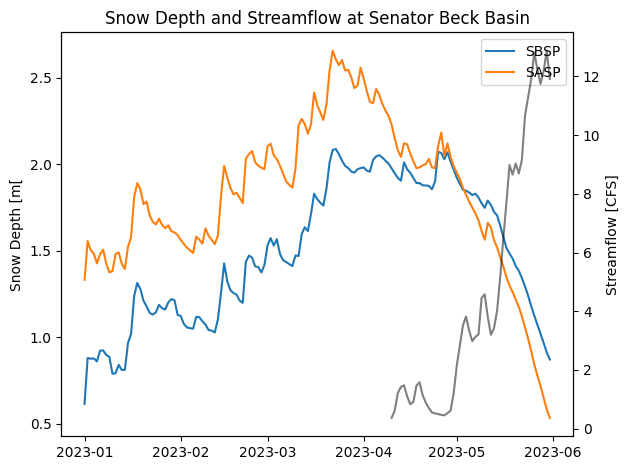

In [3]:
fig, ax =  plt.subplots(1)
ax.plot(df_sbsp.index.get_level_values('datetime'), df_sbsp[variable.name], label=sbsp.id)
ax.plot(df_sasp.index.get_level_values('datetime'), df_sasp[variable.name], label=sasp.id)

ax1 = ax.twinx()
ax1.plot(df_sbsg.index.get_level_values('datetime'), 
         df_sbsg[stream_var.name], label='streamflow', color='black', alpha=0.5)
ax.set_title('Snow Depth and Streamflow at Senator Beck Basin')
ax.set_ylabel('Snow Depth [m[')
ax1.set_ylabel('Streamflow [CFS]')
ax.legend()
plt.tight_layout()
plt.show()

Thats all it takes! Putney Study plot is also available. Note: There are limitation in dates metloom is designed to pull all available data online which is lagging from realtime a bit. Happy metloom-ing!